# Homework 2: DataFrames, Data Visualization, and Functions

## Due Tuesday, January 31 at 11:59PM

Welcome to Homework 2! This week, we will cover DataFrame manipulations, making visualizations, and defining functions. You can find additional help on these topics in  [BPD 6, 9-12](https://notes.dsc10.com/01-getting_started/functions-defining.html) in the `babypandas` notes and [CIT 7-7.3](https://inferentialthinking.com/chapters/07/Visualization.html) in the textbook.

### Instructions

Remember to start early and submit often. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor.

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (see the schedule on the [Calendar](https://dsc10.com/calendar)) or EdStem. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

**Please do not use for-loops for any questions in this homework.** If you don't know what a for-loop is, don't worry – we haven't covered them yet. But if you do know what they are and are wondering why it's not OK to use them, it is because loops in Python are slow, and looping over arrays and DataFrames should usually be avoided.

In [5]:
# Please don't change this cell, but do make sure to run it
import babypandas as bpd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 5)


## 1. Are You Scared Yet? Analyzing Horror Movies 🎃😱

<center><img src="./images/hocus_pocus.jpg" width = 400/></center>

Spooky season may have passed a few months ago, but it's never too late to watch horror movies! We've provided a file in the `data/` directory called `horror_movies.csv` that contains 464 movies, each with 10 columns (see the table below) that we'll use to generate some insights about the state of horror movies in recent years. 

| Column      | Description |
| ----------- | ----------- |
| `'Title'`      | Title of the movie       |
| `'Country'`   | Country the movie was originally released in        |
| `'Maturity Rating'` | A rating given to the movie by the Motion Picture Association |
| `'Review Rating'` | The IMDb rating of the film, representing how good it was | 
| `'Language'` | The language the movie is in | 
| `'Filming Locations'` | The location in which the movie was filmed |
| `'Budget'` | The total amount spent on the movie |
| `'Release Month'` | The month the movie was released |
| `'Release Day'` | The day the movie was released |
| `'Run Time'` | The length of the film in minutes |

Run the cell below to read the file containing all of the horror movies into a DataFrame called `horror`.

In [6]:
horror = bpd.read_csv('data/horror_movies.csv') 
horror

,Title,Country,Maturity Rating,Review Rating,Language,Filming Locations,Budget,Release Month,Release Day,Run Time
0,Rise of the Animals (2011),USA,NOT RATED,3.6,English,"Rochester, New York, USA",7000,May,1,70
1,Zombie Resurrection (2014),UK,NOT RATED,2.7,English,"Hampshire, England, UK",100000,March,23,86
2,Before Dawn (2013),Japan,NOT RATED,4.7,English,"Yorkshire, England, UK",25000,June,8,82
3,Apparition (2015),USA,NOT RATED,4.0,English,"Philadelphia, Pennsylvania, USA",3000000,May,5,100
4,Her Cry: La Llorona Investigation (2013),USA,NOT RATED,5.4,English,"Houston, Texas, USA",60000,April,19,89
...,...,...,...,...,...,...,...,...,...,...
459,Insidious: Chapter 3 (2015),USA,PG-13,6.1,English,"929 South Broadway, Downtown, Los Angeles, Cal...",10000000,June,5,97
460,The Purge (2013),USA,R,5.7,English,"Chatsworth, Los Angeles, California, USA",3000000,June,7,85
461,13 Sins (2014),Poland,R,6.3,English,"New Orleans, Louisiana, USA",4000000,April,11,93
462,Victor Frankenstein (2015),USA,PG-13,6.0,English,"London, England, UK",40000000,November,25,110


**Question 1.1.** Examine the columns available in `horror` and consider which would be the best choice of index for this DataFrame. Change the `horror` DataFrame so that it's indexed by the values in this column instead of the default index.

In [7]:
horror = horror.set_index('Title')
horror

,Country,Maturity Rating,Review Rating,Language,Filming Locations,Budget,Release Month,Release Day,Run Time
Title,,,,,,,,,
Rise of the Animals (2011),USA,NOT RATED,3.6,English,"Rochester, New York, USA",7000,May,1,70
Zombie Resurrection (2014),UK,NOT RATED,2.7,English,"Hampshire, England, UK",100000,March,23,86
Before Dawn (2013),Japan,NOT RATED,4.7,English,"Yorkshire, England, UK",25000,June,8,82
Apparition (2015),USA,NOT RATED,4.0,English,"Philadelphia, Pennsylvania, USA",3000000,May,5,100
Her Cry: La Llorona Investigation (2013),USA,NOT RATED,5.4,English,"Houston, Texas, USA",60000,April,19,89
...,...,...,...,...,...,...,...,...,...
Insidious: Chapter 3 (2015),USA,PG-13,6.1,English,"929 South Broadway, Downtown, Los Angeles, Cal...",10000000,June,5,97
The Purge (2013),USA,R,5.7,English,"Chatsworth, Los Angeles, California, USA",3000000,June,7,85
13 Sins (2014),Poland,R,6.3,English,"New Orleans, Louisiana, USA",4000000,April,11,93


In [ ]:
grader.check("q1_1")

_Note:_ If you were to run the cell where you set the index of `horror` again, you'd see an error message. Stop and think about _why_ you'd run into an error. Once you've thought about it, click the thinking emoji below to see the reason for the error.

<br>

<details>
    <summary>Why would there be an error? 🤔</summary>
    There would be an error since you'd be trying to set the index of <code>horror</code> to a column that no longer exists in <code>horror</code> – the column wouldn't exist because it was converted to the index the first time you ran the cell (and the index is not a column)!
</details>

If you acually ran the cell twice and got an error message, don't worry. To get rid of it, re-run the cell in 1.1 where you defined the `horror` DataFrame, then run the cell in 1.2 just once, and you'll be good to go.

When you submit your work for autograding, the entire notebook will be run from start to finish. Each cell will run only once, so it's no problem if your code errors on the second run. In this case, it means you're doing something right!

**Question 1.2.** *Train to Busan*, released in 2016, is the highest-budget movie in our dataset. What is the budget of `'Train to Busan (2016)'`, and what is its `'Review Rating'`? Assign your answers to variables `Busan_budget` and `Busan_rating`, respectively.

In [8]:
Busan_budget = horror.get('Budget').loc['Train to Busan (2016)']
Busan_rating = horror.get('Review Rating').loc['Train to Busan (2016)']
print("The budget for Train of Busan was", Busan_budget, "and the rating was", Busan_rating)

The budget for Train of Busan was 10000000000 and the rating was 7.5


In [ ]:
grader.check("q1_2")

The supposed budget for *Train to Busan* according to our dataset is absurdly high (over 5 times Rihanna's net worth 💎). That's because the movie's budget is reported in South Korean won, not US dollars. Unfortunately, our data set doesn't specify the units of the `'Budget'` column so we would have no way to know this besides context. The current exchange rate for South Korean won is 1 won $ = $ 0.00081 US dollars, so in US dollars, this budget would be as shown below.

In [9]:
Busan_budget*0.00081

8100000.0

Now, that's still a lot of money, but it's much more on par with the budgets of other movies.

**Question 1.3.** Assign `top_rated_movie` to the name of the movie with the highest `'Review Rating'` (including the year in parentheses), and set the `'Review Rating'` of that movie to `top_rating`.

In [10]:
top_rated_movie = horror.get('Review Rating').sort_values(ascending=False).index[0]
top_rating = horror.get('Review Rating').sort_values(ascending=False).iloc[0]
print("The top-rated movie is", top_rated_movie, "with a rating of", top_rating)

The top-rated movie is Psychedelia (2016) with a rating of 8.6


In [ ]:
grader.check("q1_3")

**Question 1.4.** That's a high rating, but how does that compare to the other movies included in the dataset? First, plot a density histogram that shows the distribution of `'Review Rating'`. Then compute the difference between the highest rating and the **median** movie rating, and assign the result to the variable `above_med`.

When plotting your histogram, remember to set `density=True` and `ec='w'`. You don't have to set the `bins` argument.

3.5999999999999996

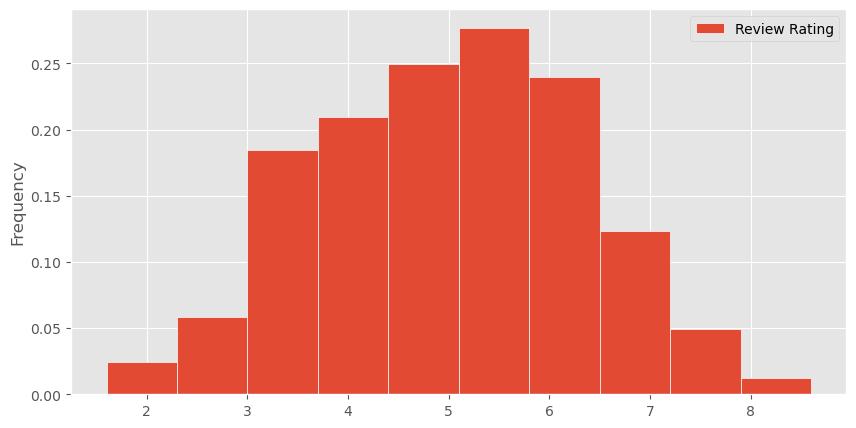

In [11]:
# Create your histogram here.
horror.plot(kind='hist',y='Review Rating',density=True,ec='w')
# Then calculate above_med.
above_med = top_rating - horror.get('Review Rating').median()
above_med

In [ ]:
grader.check("q1_4")

**Question 1.5.** How many movies in our dataset were released in October and have been given a `'Maturity Rating'`? Note that movies without a `'Maturity Rating'` appear as either `'NOT RATED'` or `'UNRATED'`.  Set the number of such movies equal to the variable `oct_rated_count`.

In [12]:
oct_rated_count =horror[(horror.get('Release Month') == 'October')&
                        (horror.get('Maturity Rating')!='Not Rated')&
                        (horror.get('Maturity Rating')!='UNRATED')].shape[0]
oct_rated_count

67

In [ ]:
grader.check("q1_5")

**Question 1.6.** Which movie titles contain the word `'dark'`, with any capitalization? Create an *array* called `dark_movies` containing the titles of all such movies, capitalized exactly as they appear in the DataFrame. 

*Hints:*
- To convert a Series into an array, call the function `np.array` on the Series.
- The movie names are all strings, so they may have inconsistencies in how they're capitalized. If we want to account for variations in capitalization, what operation should we call on the movie names **first**? (You may end up using `.str` twice!)

In [13]:
#dark_movies = horror[(horror.get('Title') == str('dark'))]
#dark_movies
np.array(horror[horror.index.str.lower().str.contains('dark')].index)

array(['6 Days Dark (2014)', 'After Dark (2013)',
       'Colour from the Dark (2008)', 'Darkside Witches (2015)',
       'Darkest Night (2012)', 'Dark Waves (2015)',
       'Darker Than Night (2014)', 'Beneath the Darkness (2011)',
       'Dark Touch (2013)', 'The Darkness (2016)', 'Dark Skies (2013)',
       'The Dark Tower (2017)', 'Dark Shadows (2012)'], dtype=object)

In [ ]:
grader.check("q1_6")

**Question 1.7.** What proportion of movies in our dataset were originally released in each country? Create a DataFrame indexed by `'Country'` with one column called `'Proportion'` containing the proportion of movies in the dataset that were released in that country. Order the rows in descending order of `'Proportion'` and assign this DataFrame to `country_proportions`.

*Hints:*
- Proportions can be easily calculated from counts.
- If you pass in a **list** of columns names to `.get()`, the result will be a DataFrame containing only the columns specified in the list. 

In [30]:
#1. use .groupby to replace .index since we will use .count() later
#2. .get() helps us to get the proportion by a divison; .shape[0]
#3. .assign(variable_name = variable from Step 2) helps us to add in a new row (in this case, "Proportion"); .drop(columns=" ") drops colomns
#4. sort in descending order (ascending=False)
country_counts = horror.groupby('Country').count().get(["Budget"])
prop = country_counts.get('Budget')/horror.shape[0]
country_proportions = country_counts.assign(Proportion = prop).drop(columns= 'Budget')
country_proportions =country_proportions.sort_values(by="Proportion", ascending=False)

#.assign("Budget" == Proportion).drop(columns=)
#country_proportions
country_proportions

,Proportion
Country,
USA,0.756466
UK,0.058190
Japan,0.015086
Kuwait,0.012931
Philippines,0.012931
...,...
Denmark,0.002155
Belarus,0.002155
Bahrain,0.002155


In [ ]:
grader.check("q1_7")

**Question 1.8**  Create a horizontal bar chart that displays the mean `'Review Rating'` for each country. Sort the bars so the country that with the lowest mean appears at the very top, and the country with the highest mean appears at the bottom.

_*Hint*_: To get the bar chart to display nicely, try adding the keyword argument `figsize = (10, 10)`.

In [ ]:
# Create your bar chart here.
...

## 2. Shine Bright Like a Diamond 💎

In this section, we're going to be working alongside Jack the Jeweler to learn more about the diamond business! The data in `data/diamonds.csv`, contains details about 10,000 diamonds, including the quality, dimensions, and price. The information about these diamonds can help Jack get a better understanding about what is valued most in the diamond business. The columns are described below:

| Column      | Description |
| ----------- | ----------- |
| `'carat'`      | The number of carats of the diamond       |
| `'cut'`   | The cut quality of the diamond   |
| `'color'` | The color of the diamond |
| `'clarity'` | The clarity of the diamond | 
| `'price'` | The diamond's price |
| `'x'` | The length of the diamond, in mm |
| `'y'` | The width of the diamond, in mm |
| `'z'` | The depth of the diamond, in mm |

Run the cell below to read in the data.

In [56]:
diamonds = bpd.read_csv('data/diamonds.csv')
diamonds

,carat,cut,color,clarity,price,x,y,z
0,2.04,Very Good,J,SI2,9482,8.07,8.04,5.11
1,0.59,Very Good,H,VVS2,1771,5.39,5.48,3.32
2,0.34,Very Good,H,VS2,689,4.45,4.39,2.80
3,1.01,Good,H,SI2,3888,6.32,6.35,4.05
4,0.50,Ideal,D,VS2,1635,5.10,5.13,3.19
...,...,...,...,...,...,...,...,...
9995,0.32,Premium,G,VS2,561,4.33,4.38,2.70
9996,0.41,Good,J,IF,1061,4.75,4.72,3.01
9997,0.30,Ideal,G,VS2,545,4.35,4.38,2.67
9998,1.25,Premium,J,SI2,4018,6.98,6.95,4.27


**Question 2.1.** One of the first things that Jack learned about when entering the diamond business was the *depth percentage* measurement . The depth percentage of a diamond is ratio of the depth to the mean of the width and length, times 100:

$$\text{depth percentage} =\dfrac{\text{depth (in mm)}}{\text{mean of width and length (in mm)}} * 100$$
    
Assign to the variable `depth_percentage` a Series with the depth percentage of each diamond in `diamonds`. Then, add a column named `'depth_percentage'` containing this Series to the `diamonds` DataFrame .

In [ ]:
def
depth_percentage = 
diamonds = 
diamonds

In [ ]:
grader.check("q2_1")

Depth percentage is important to jewelers because it determines how light refracts through the stone, which in turn affects the visual appearance of the diamond. Diamonds that are too shallow have grey rings (called "fish eyes" 🐟 ), and diamonds that are too deep have dark spots in the middle (called "nail heads" 🔨). The ideal depth percentage for a diamond is between 54 and 66 percent, inclusive. These diamonds really sparkle! ✨

<center><img src=images/depth_percentage.jpg width=500>
<a href="https://www.ori-diamonds.com/blog/diamond-depth">source</a></center>

**Question 2.2.** Jack is curious as to how common ideally proportioned diamonds actually are. Calculate the proportion of diamonds that have an ideal depth percentage (between 54 to 66 percent, inclusive) and set the result to the variable `ideal_prop`.

In [ ]:
ideal_prop = ...
ideal_prop

In [ ]:
grader.check("q2_2")

**Question 2.3.** Jack has been taught that the depth percentage has an impact on the visual impact of a diamond, which he suspects also affects the price. Create a scatter plot showing how the price of a diamond varies with its depth percentage.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_3
manual: True
-->

In [ ]:
# Create your scatter plot here.
...

<!-- END QUESTION -->



Hmm... perhaps there's a bit more to diamond pricing than just depth percentage! Jack explains that there are four common measures of the quality of a diamond, sometimes called the 4 C's: `'carat'`, `'cut'`, `'clarity'`, and `'color'`.

1) The `'carat'` simply measures the weight of the diamond. 

2) The `'cut'` is related to the depth proportion, and is considered either Ideal, Premium, Very Good, Good, or Fair (in descending order of quality).

3) The `'clarity'` describes whether the diamond has any flaws. In descending order of quality, the values of `'clarity'` in our dataset are `'IF'` (which stands for "internally flawless"), `'VVS1'`, `'VVS2'`, `'VS1'`, `'VS2'`, `'SI1'`, `'SI2'`, and `'I1'`.

<center><img src=images/clarity.jpg width=400>
<a href="https://www.petragems.com/education/diamond-clarity/">source</a></center>

4) The `'color'` of each diamond in our dataset is described by a letter between `'D'` and `'J'`, where '`D'` represents a diamond with no color, and `'J'` represents a diamond with some color to it. Diamonds with less color are considered higher quality.

<center><img src=images/color.jpg width=200>
<a href="https://bashertjewelry.com/pages/diamonds-color-grading">source</a></center>

The `'carat'` column of `diamonds` contains numerical data, but the columns for the other 3 C's contain ordered categorical data. Since the data has an order to it, we can convert the values in those columns into numerical values, to make for easier comparisons. For example, if we assign all the values of `'J'` in the `color` column to 1, all the values of `'I'` in the `color` column to 2, etc., we'll more easily be able to search for diamonds where the color is better than an `'F'` (we could search for color values greater than 5).

For each of `'cut'`, `'clarity'`, and `'color'`, let's translate the data from categorical values to numerical values. For all three of these quality measures, we'll use the number 1 to represent the lowest quality category, and we'll count up from there by one for each category. For example, the numbers for `'clarity'` will range from 1 (for `'I1'`-rated diamonds) to 8 (for internally flawless, or `'IF'`-rated diamonds).

**Question 2.4.** Create three functions, called `cut_numerical`, `clarity_numerical` and `color_numerical`, where each function takes in a string value describing the categorical quality for the `'cut'`, `'clarity'`, or `'color'`, respectively, and outputs the corresponding numerical value, as described above. 

In [ ]:
def cut_numerical(cut):
    ...
    
def clarity_numerical(clarity):
    ...

def color_numerical(color):
    ...

In [ ]:
grader.check("q2_4")

**Question 2.5.** Now, replace the categorical values in the `'cut'`, `'clarity'`, and `'color'` columns of `diamonds` with their numerical equivalents.

_Hint_: You can use the `.assign` method to replace values in a column, without having to create additional columns.

In [ ]:
diamonds = ...
diamonds

In [ ]:
grader.check("q2_5")

**Question 2.6.** One of Jack's customers comes into Jack's store asking for a diamond whose `'cut'` is `'Premuim'` or better, and whose `'color'` is `'F'` or better. The customer only has $500 to spend on a diamond. Create a variable `customer_choices` that contains a DataFrame of all the diamonds in `diamonds` that fits the customer's criteria and budget.

In [ ]:
customer_choices = ...
customer_choices

In [ ]:
grader.check("q2_6")

**Question 2.7.** Jack wants you to find out which of the 4 C's is most closely connected to the price of a diamond. Assign an integer from 1 to 4 representing your answer to Jack's question to the variable `best_price_indicator`.

1. `'carat'`
2. `'cut'`
3. `'clarity'`
4. `'color'`

*Hint*: Use scatter plots to see the relationship of each variable with `'price'`.

In [ ]:
best_price_indicator = ...

In [ ]:
grader.check("q2_7")

**Question 2.8.** Jack asks you to show him the median price of a diamond as the length of the diamond (in mm) increases. Since Jack is more of a visuals type of person, he wants you to show him this trend in a graph. Create a plot that shows the trend of the median price of a diamond as the length of the diamond increases.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_8
manual: True
-->

In [ ]:
# Create your plot here.
...

<!-- END QUESTION -->



## 3. Game On! 🎮

Here, we'll be working with a dataset taken from [Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings) that contains sales information for thousands of video games, including some released this year. In the cell below, we load the dataset in as a DataFrame named `video_games`. Take some time to understand what each column of `video_games` represents, as we haven't provided you with a description of each column.

In [5]:
# Run this cell to load the dataset.
video_games = bpd.read_csv('data/video_game_ratings.csv')
video_games

,title,year,genre,rating,votes,directors,plot
0,The Last of Us: Part I,2022,"Action, Adventure, Drama",9.8,601,"Matthew Gallant, Bruce Straley",Experience the emotional storytelling and unfo...
1,Red Dead Redemption II,2018,"Action, Adventure, Crime",9.7,"36,441",Missing,Amidst the decline of the Wild West at the tur...
2,The Witcher 3: Wild Hunt - Blood and Wine,2016,"Action, Adventure, Drama",9.7,"7,610",Konrad Tomaszkiewicz,Geralt is in the southern province of Toussain...
3,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,"26,328",Konrad Tomaszkiewicz,A monster hunter for hire embarks on an epic j...
4,The Last of Us,2013,"Action, Adventure, Drama",9.7,"61,103","Neil Druckmann, Bruce Straley","In a hostile, post-pandemic world, Joel and El..."
...,...,...,...,...,...,...,...
12630,Superman,1999,"Action, Adventure, Family",1.4,646,Missing,The first 3D Superman game. Your friends Lois ...
12631,Action 52,1991,"Action, Family, Fantasy",1.3,135,"Raul Gomila, Vince Perri",Play the action at your fingertips with 52 gam...
12632,Plumbers Don't Wear Ties,1994,"Comedy, Romance",1.3,338,Michael Anderson,"John, an unattached plumber, meets and falls i..."
12633,Animal Soccer World,2005,"Animation, Sport",1.2,125,Roswitha Haas,Everybody is busy with the preparations for th...


**Question 3.1.** If you look at the `'votes'` column in the DataFrame, you'll notice that there are commas in some of the numbers. For example, in the second row of the DataFrame, the value in the `votes` column is `36,441`. These commas indicate that the `'votes'` column contains strings, not integers, since Python never displays integers with commas.

Write a function `convert_votes_to_int` that takes in a string `v` as input and outputs `v` as an integer, after removing any commas. 

Then, use your function to update the `'votes'` column in the `video_games` DataFrame so that it contains integers rather than strings. Make sure to "save" your changes in the `video_games` DataFrame!

In [18]:
def convert_votes_to_int(v):
    return int(v)


In [ ]:
video_games = 
video_games

In [ ]:
grader.check("q3_1")

**Question 3.2.** You are curious as to whether there is a relationship between the number of votes a game receives and the rating of the game. Create an appropriate plot that shows the relationship between these two variables.

Then use the plot you made to answer the following question: 

> What type of ratings do video games with a higher number of votes tend to have?

Assign an integer from 1 to 3 representing your answer to the variable `q3_2`.

1. Video games with a higher number of votes tend to have higher ratings.
2. Video games with a higher number of votes tend to have lower ratings.
3. There is no association between number of votes and rating.

In [ ]:
# Create your plot here.
...

In [ ]:
q3_2 = ...
q3_2

In [ ]:
grader.check("q3_2")

**Question 3.3.** Assign `most_common_genres` to a DataFrame that contains the ten most common genres of video games, in descending order. The DataFrame should be indexed by `'genre'` and have only one column, `'count'`, which is the number of video games in that genre.

*Note:* For this question, we will treat each video game as having only one genre. For example, `'Action, Adventure, Drama'` is considered to be its own genre.

In [ ]:
most_common_genres = ...
most_common_genres

In [ ]:
grader.check("q3_3")

**Question 3.4.** Using the `most_common_genres` DataFrame you created in Question 3.3, create a horizontal bar chart that shows the distribution of video games into these ten genres. Make sure your plot has the most common genre as the top-most bar in the bar chart.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->

In [ ]:
# Create your plot here.
...

<!-- END QUESTION -->



**Question 3.5.** Assign the variable `third_lowest` to the genre of video games with the third lowest average rating (among all genres, not just the ones you looked at in Questions 3.3 and 3.4).

Do not manually type out your answer. Use `babypandas` methods to produce the answer.

*Note:* Again, we will consider a video game with multiple genres to have only one genre. For example, `'Action, Adventure, Drama'` is considered to be its own genre.

In [ ]:
third_lowest = ...
third_lowest

In [ ]:
grader.check("q3_5")

**Question 3.6.** Create a histogram showing the distribution of video game ratings in the `video_games` DataFrame.

Remember to set `density=True` since we always use density histograms and `ec='w'` to make the separation of the bars more clear. You don't have to set the `bins` argument.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3_6
manual: true
-->

In [ ]:
# Create your plot here.
...

<!-- END QUESTION -->

**Question 3.7.** There is one director who has directed exactly 27 video games **alone** (with no-codirectors).

Below, assign `director_of_27` to the name of this director. Do not manually type out the director's name. Instead, use `babypandas` methods to extract the name.

<!--
BEGIN QUESTION
name: q3_7
-->

In [ ]:
director_of_27 = ...
director_of_27

In [ ]:
grader.check("q3_7")

## 4. The Best Invention of the 20th Century 🍜

Instant ramen was first invented by Momofuku Ando in 1958 to cure hunger during wartime. It started off with only one kind for its original purpose, but the instant ramen industry has expanded over the years, and now there are over 100 different kinds of instant ramen. At the turn of the millenium, 2000 Japanese citizens even [ranked](https://abcnews.go.com/International/story?id=81946&page=1) instant ramen as the best invention of the 20th century! Click [here](https://www.cupnoodles-museum.jp/en/osaka_ikeda/) to learn more about the history of this quintessential college meal.

<img src="./images/noodles-lowres-8607.png" width=350/>

We have a [dataset of instant ramen ratings from Kaggle](https://www.kaggle.com/datasets/residentmario/ramen-ratings?resource=download). First, we'll read in the data from a CSV. There is no good index, so we will leave it unset.

In [19]:
ramen_data = bpd.read_csv('data/ramen-rating.csv')
ramen_data

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,JP,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,TW,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,TW,2.75
4,Ching's Secret,Singapore Curry,Pack,IN,3.75
...,...,...,...,...,...
2572,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,VN,3.50
2573,Wai Wai,Oriental Style Instant Noodles,Pack,TH,1.00
2574,Wai Wai,Tom Yum Shrimp,Pack,TH,2.00
2575,Wai Wai,Tom Yum Chili Flavor,Pack,TH,2.00


Notice that the `'Country'` column contains a country code. We want to convert these country codes into actual country names that everyone can understand.

We'll use a Python [dictionary](https://www.tutorialspoint.com/python/python_dictionary.htm) to help us with this conversion. A dictionary is a simple way to map a unique key to a value. For example, the dictionary below maps course codes to course names.

In [20]:
dsc_courses = {
    # key: value
    'DSC 10': 'Principles of Data Science',
    'DSC 20': 'Programming and Basic Data Structures for Data Science',
    'DSC 30': 'Data Structures and Algorithms for Data Science',
    'DSC 40A': 'Theoretical Foundations of Data Science I',
    'DSC 40B': 'Theoretical Foundations of Data Science II',
    'DSC 80': 'The Practice and Application of Data Science'
}

We can access the value corresponding to each key using bracket notation.

In [21]:
dsc30_name = dsc_courses['DSC 30']
dsc30_name

'Data Structures and Algorithms for Data Science'

Here, `'DSC 30'` is the key and `'Data Structures and Algorithms for Data Science'` is the value.

Let's use a dictionary to help us with our country code to country name conversion. Below is a dictionary containing country codes as keys and country names as values for each of the countries in our ramen dataset.

In [22]:
# Run this cell, DO NOT change it.
country_codes = {
    'AU':'Australia',
    'BD':'Bangladesh', 
    'BR':'Brazil', 
    'KH':'Cambodia' , 
    'CA':'Canada', 
    'CN':'China',
    'CO':'Colombia', 
    'DXB':'Dubai' , 
    'EE':'Estonia' , 
    'FIJI':'Fiji', 
    'FI':'Finland' , 
    'DE':'Germany',
    'GHAN':'Ghana' , 
    'NL':'Holland', 
    'HK':'Hong Kong', 
    'HU':'Hungary', 
    'IN':'India', 
    'ID':'Indonesia',
    'JP':'Japan', 
    'MY':'Malaysia', 
    'MX':'Mexico', 
    'MM':'Myanmar', 
    'NP':'Nepal', 
    'AN':'Netherlands',
    'NG':'Nigeria', 
    'PK':'Pakistan', 
    'PH':'Philippines', 
    'PL':'Poland', 
    'SWK':'Sarawak',
    'SG':'Singapore', 
    'KOR':'South Korea', 
    'SE':'Sweden', 
    'TW':'Taiwan', 
    'TH':'Thailand', 
    'UK' :'United Kingdom' ,
    'USA':'United States', 
    'VN':'Vietnam' 
    }


**Question 4.1.** Using the dictionary `country_codes`, define a function named `code_to_country` that takes as input a country code and returns the corresponding country's name. This should only take one line of code.

_*Hints*_: 
- If you're stuck, take a look at the DSC 30 example above.
- Once you've implemented `code_to_country`, you should verify that it works as intended by trying a few examples yourself. The provided tests will **not** do this for you.

In [ ]:
def code_to_country(code):
    

In [ ]:
grader.check("q4_1")

**Question 4.2.** Use your `code_to_country` function and the `.apply` method to convert all of the country codes in the `'Country'` column of `ramen_data` into country names. Do this without creating an additional column or reordering the existing columns. Assign the resulting DataFrame to the variable name `ramen`.

In [ ]:
ramen = ...
ramen

In [ ]:
grader.check("q4_2")

🚨 **Important**: For the rest of the questions in this section, use the DataFrame `ramen` instead of `ramen_data`.

**Question 4.3.** 
Define a function named `word_count` that returns the number of words in a ramen's `'Variety'`. It should take as input a string from the `'Variety'` column and  return the number of words in that string. We'll consider a piece of text to be a word if and only if it is separated from adjacent words by a space. 
For example:
- `word_count('Cup Noodles Chicken Vegetable')` should return 4.
- `word_count('Tonkotsu-Shoyu Rich Pork Flavor Ramen')` should return 5. Notice that `'Tonkotsu-Shoyu'` counts as one word.

_*Hint*_: The string method [`.split`](https://docs.python.org/3/library/stdtypes.html#str.split) will be helpful.

In [ ]:
def word_count(variety):
    ...
    
# Test cases for your own reference. Feel free to test out more!
print(word_count('Cup Noodles Chicken Vegetable'))  # Should print 4
print(word_count('Tonkotsu-Shoyu Rich Pork Flavor Ramen')) # Should print 5

In [ ]:
grader.check("q4_3")

**Question 4.4.** Create a DataFrame called `with_word_count` with columns from left to right `'Brand'`, `'Country'`, `'Stars'` , `'Style'`, and `'Variety'`and a new column `'Word_Count'` that has the word count for each variety. Sort the DataFrame in descending order of `'Word_Count'`.

_*Note*_: The `'Country'` column should have full country names, not codes.

In [ ]:
with_word_count = ...
with_word_count

In [ ]:
grader.check("q4_4")

**Question 4.5.** Among the ramen that has `'Japan'` in their Country column, how many words does the longest ramen `'Variety'` have? Assign this number to `most_ramen_words`. How many words does the shortest ramen `'Variety'` have? Assign this number to `fewest_ramen_words`. What is the absolute difference between these values? Assign this number to `range_ramen_words`.

In [ ]:
most_ramen_words = ...
fewest_ramen_words = ...
range_ramen_words = ...

print('Most ramen words', most_ramen_words)
print('Fewest ramen words:', fewest_ramen_words)
print('Range of ramen words:', range_ramen_words)

In [ ]:
grader.check("q4_5")

**Question 4.6.** Create a function named `mean_stars` that takes as an input the name of a ramen brand and returns the average `'Stars'` for all ramen belonging to that brand.

In [ ]:
def mean_stars(brand):
    ...

In [ ]:
grader.check("q4_6")

**Question 4.7.** Create a horizontal bar chart that displays the mean word count for all ramen brands that have **more than 10 varieties**. Sort the bars so the brands whose varieties have the most words on average appear at the very top, and those with the fewest words on average appear at the bottom.

_*Hints*_: 
- If you use `.groupby` more than once on the same DataFrame, the order of rows will be the same, even with different aggregation methods, as long as the column you group by is the same.
- To get the bar chart to display nicely, try adjusting the optional `figsize` argument.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4_7
manual: true
-->

In [ ]:
# Create your plot here.
...

<!-- END QUESTION -->



**Question 4.8.** Define a function named `point_total` that takes in a full country name and returns a point total for that country's ramen, according to the following scheme:
- 1 point for every variety of ramen that has at least 1 star and less than 3 stars,
- 2 points for every variety with at least 3 stars and less than 4 stars, and
- 3 points for every variety with at least 4 stars (and at most 5 stars, which is the maximum possible).

|Points Received | Stars (Condition)| 
| --- | --- | 
|1| $[1,3)$|
|2| $[3, 4)$ | 
|3| $[4,5]$ |

_*Hint*_: Make sure that your function works for countries that don't have varieties of ramen at every possible number of stars. If you aren't able to accomplish this using grouping, try another strategy! Remember, don't use a for-loop. There is a better solution using DataFrame manipulations.

In [ ]:
def point_total(country):
    ...

In [ ]:
grader.check("q4_8")

**Question 4.9.** Among the five countries listed below, which has the **highest** point total, using the points system from Question 4.8?

-  `'United States'`
-  `'Singapore'`
-  `'Canada'`
-  `'China'`
-  `'Vietnam'`

Save the name (not country code) of the country as `country` and the country's number of points as `points`. You can set the value of `country` and `points` by hand for this question based on the output of the function you just wrote, for various inputs.

In [ ]:
country = ...
points = ...

In [ ]:
grader.check("q4_9")

*Note*: While they don't serve _instant_ ramen, a new ramen restaurant recently opened on campus, named [Underbelly](https://sandiego.eater.com/2022/10/3/23385430/izakaya-underbelly-japanese-restaurant-ramen-cocktail-bar-new-opening-ucsd). It's the second ramen restaurant on campus, joining [Showa](https://showaramen.com). Try them out and see how many stars they deserve! ⭐

## 5. Final Stretch 🧘‍♀️

Suppose we have a DataFrame called `data` with two numerical columns, `'x'` and `'y'`. Consider the following scatter plot, which was generated by calling `data.plot(kind='scatter', x='x', y='y')`:

<img src="./images/q4_scatter.png" width=400/>

Now consider these two histograms:

<center>
    <table><tr>
        <td><center><b>Histogram A</b><br> <img src="images/q4_hist_one.png" width=400></center> </td>
        <td><center><b>Histogram B</b><br> <img src="images/q4_hist_two.png" width=400></center> </td>
    </tr></table>
</center>

**Question 5.1.** Which of the following lines of code generated Histogram A? Assign either `1`, `2`, `3`, or `4` to `which_code`.
 1. `data.plot(kind='hist', density=False, y='x')`
 2. `data.plot(kind='hist', density=False, y='y')` 
 3. `data.plot(kind='hist', density=True, y='x')`
 4. `data.plot(kind='hist', density=True, y='y')`

In [ ]:
which_code = ...

In [ ]:
grader.check("q5_1")

**Question 5.2.** Suppose we run this block of code:

```py
new_data = bpd.DataFrame().assign(
    x = data.get('x') / 5,
    y = data.get('y')
)
```
    
We then run 

`new_data.plot(kind='hist', density=True, y='x')`.

How will this histogram look compared to the histogram created by 

`data.plot(kind='hist', density=True, y='x')`, 

assuming both histograms are drawn on the same axes? Assign `histogram_difference` to either 1, 2, 3, or 4, corresponding to your choice.

1. The `new_data` histogram will be wider and taller than the `data` histogram.
2. The `new_data` histogram will be wider and shorter than the `data` histogram.
3. The `new_data` histogram will be narrower and taller than the `data` histogram.
4. The `new_data` histogram will be narrower and shorter than the `data` histogram.

_*Hint*_: Look at the end of [Lecture 7](https://dsc10.com/resources/lectures/lec07/lec07.html#Plotting-overlaid-histograms) for an example of two histograms drawn on the same axes.

In [ ]:
histogram_difference = ...

In [ ]:
grader.check("q5_2")

**Question 5.3.** Below, we show Histogram B again.

<img src="./images/q4_hist_two.png" width=400/>

What **percent** of values in Histogram B are between -4 (inclusive) and -2 (exclusive)? While we cannot answer this question exactly since we do not know where the bins start and end, we can still approximate the answer. Assign the variable `percent_between` to a number 1 through 5, corresponding to the closest answer.

1. 10% 
2. 13% 
3. 27%
4. 35%
5. 48%

In [ ]:
percent_between = ...

In [ ]:
grader.check("q5_3")

## Finish Line 

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [ ]:
grader.check_all()